In [14]:
import numpy as np
import scipy.io as sio
# conda install -c conda-forge array2gif 
from array2gif import write_gif
import matplotlib.pyplot as plt
# conda install -c anaconda pillow 
from PIL import Image
import glob

## Ecuación de Burger

- Reinolds = 10

In [2]:
data_burger = "datasets/Burgers_v1000-004/burgers_data_R10.mat"
mat_burger = sio.loadmat(data_burger)

In [3]:
mat_burger.keys()

dict_keys(['__header__', '__version__', '__globals__', 'a', 'a_smooth', 'a_smooth_x', 'a_x', 'u'])

In [4]:
a_burger = mat_burger["a"]
a_smooth_burger = mat_burger["a_smooth"]
a_smooth_x_burger = mat_burger["a_smooth_x"]
a_x_burger = mat_burger["a_x"]
u_burger = mat_burger["u"]

In [25]:
a_burger.shape

(2048, 8192)

In [7]:
u_burger.shape

(2048, 8192)

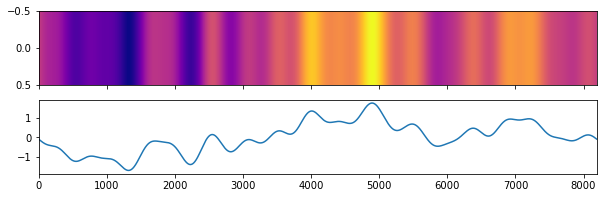

In [26]:
fig, ax = plt.subplots(2,1,figsize = (10,3), sharex = True)
ax[0].imshow(a_x_burger[0,:].reshape(1,8191), cmap="plasma", aspect="auto")
ax[1].plot(a_x_burger[0,:]);

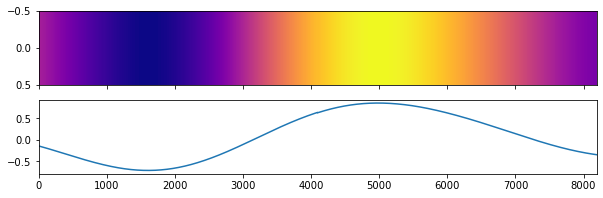

In [24]:
fig, ax = plt.subplots(2,1,figsize = (10,3), sharex = True)
ax[0].imshow(a_smooth_x_burger[0,:].reshape(1,8191), cmap="plasma", aspect="auto")
ax[1].plot(a_smooth_x_burger[0,:]);

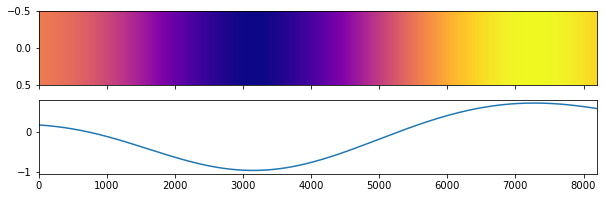

In [21]:
fig, ax = plt.subplots(2,1,figsize = (10,3), sharex = True)
ax[0].imshow(a_smooth_burger[0,:].reshape(1,8192), cmap="plasma", aspect="auto")
ax[1].plot(a_smooth_burger[0,:]);

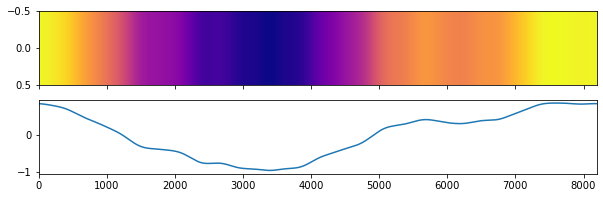

In [19]:
fig, ax = plt.subplots(2,1,figsize = (10,3), sharex = True)
ax[0].imshow(a_burger[0,:].reshape(1,8192), cmap="plasma", aspect="auto")
ax[1].plot(a_burger[0,:]);

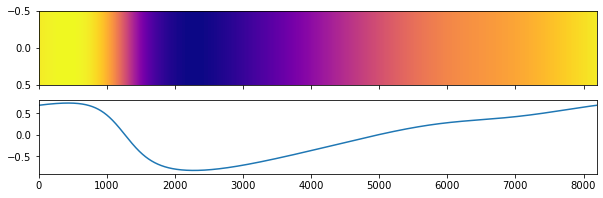

In [28]:
fig, ax = plt.subplots(2,1,figsize = (10,3), sharex = True)
ax[0].imshow(u_burger[0,:].reshape(1,8192), cmap="plasma", aspect="auto")
ax[1].plot(u_burger[0,:])

- Otro

In [29]:
data_burger_1 = "datasets/Burgers_v1000-004/burgers_v100_t100_r1024_N2048.mat"
mat_burger_1 = sio.loadmat(data_burger_1)

/home/oscar/anaconda3/envs/proyectoDL/lib/python3.9/site-packages/scipy/io/matlab/mio.py:226: MatReadWarning: Duplicate variable name "None" in stream - replacing previous with new
Consider mio5.varmats_from_mat to split file into single variable files
  matfile_dict = MR.get_variables(variable_names)


In [30]:
input_burger_1 = mat_burger_1["input"]
output_burger_1 = mat_burger_1["output"]
sigma_burger_1 = mat_burger_1["sigma"]
steps_burger_1 = mat_burger_1["steps"]
tau_burger_1 = mat_burger_1["tau"]
tspan_burger_1 = mat_burger_1["tspan"]
u0eval_burger_1 = mat_burger_1["u0eval"]
visc_burger_1 = mat_burger_1["visc"]
function_workspace_burger_1 = mat_burger_1["__function_workspace__"]

In [31]:
input_burger_1.shape

(2048, 1024)

In [32]:
output_burger_1.shape

(2048, 101, 1024)

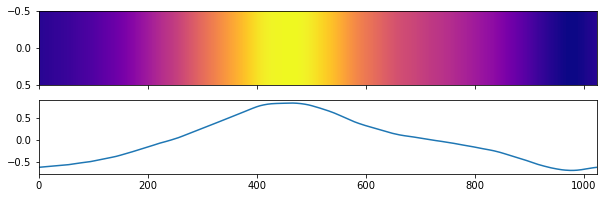

In [33]:
fig, ax = plt.subplots(2,1,figsize = (10,3), sharex = True)
ax[0].imshow(input_burger_1[0,:].reshape(1,1024), cmap="plasma", aspect="auto")
ax[1].plot(input_burger_1[0,:]);

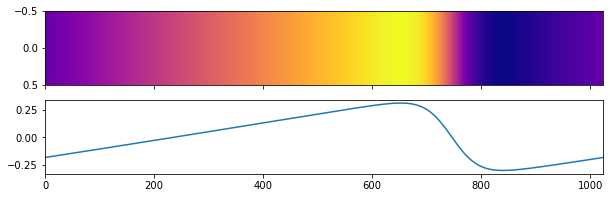

In [40]:
fig, ax = plt.subplots(2,1,figsize = (10,3), sharex = True)
ax[0].imshow(output_burger_1[0,-2,:].reshape(1,1024), cmap="plasma", aspect="auto")
ax[1].plot(output_burger_1[0,-2,:])

- Otro

<ipython-input-46-6225ff34852a>:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(2,1,figsize = (10,3), sharex = True)


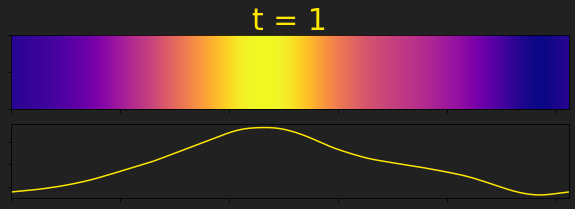

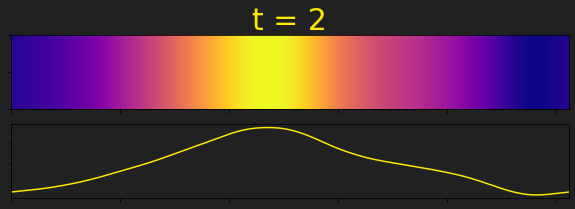

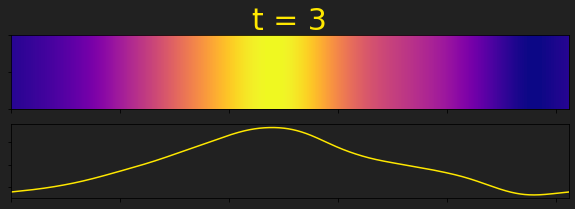

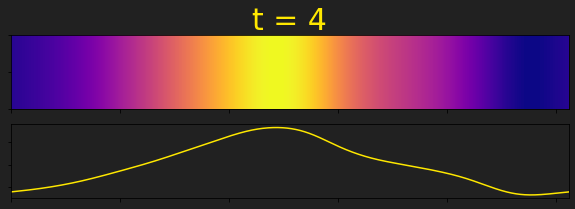

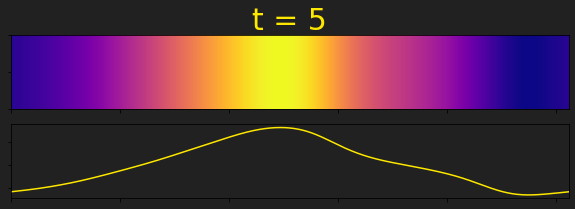

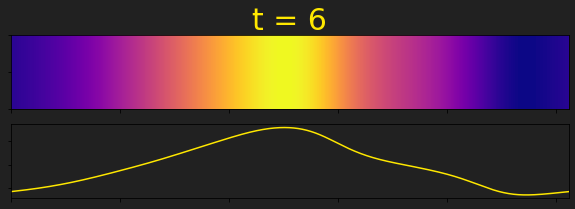

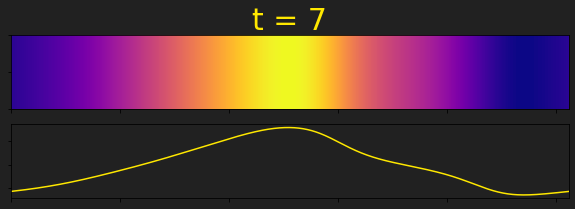

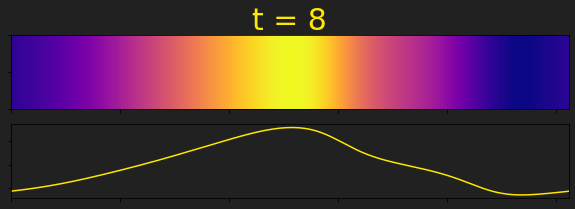

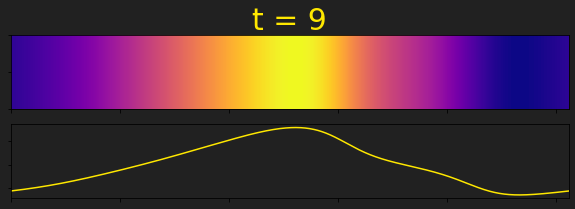

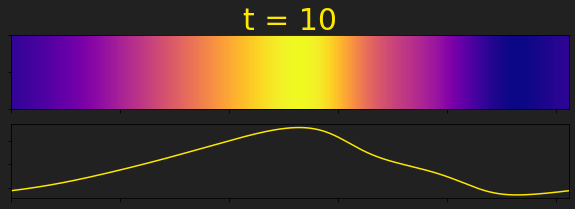

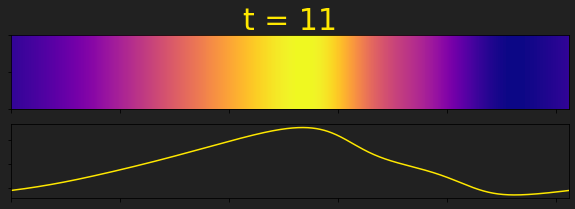

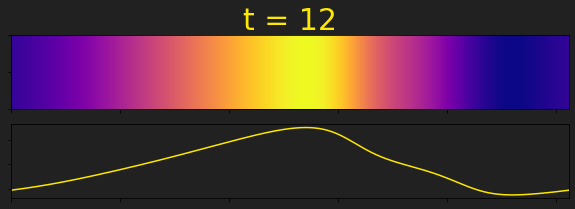

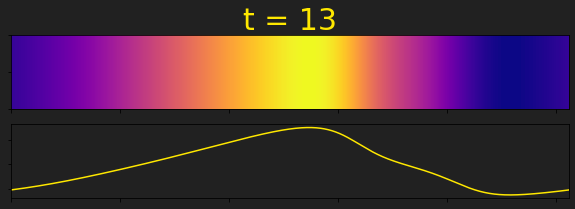

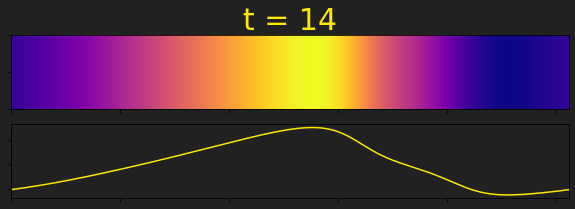

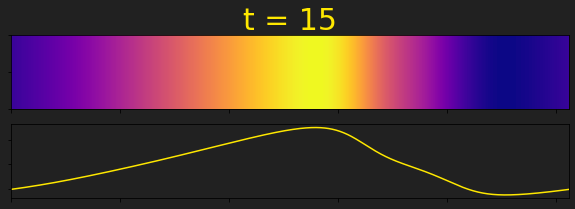

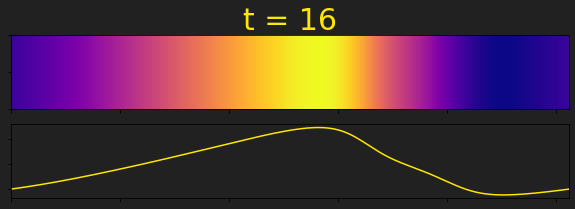

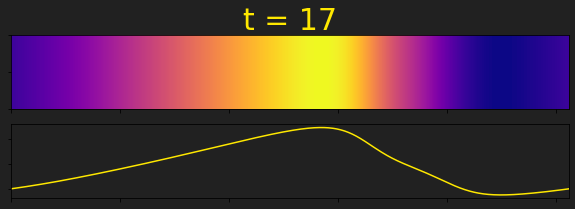

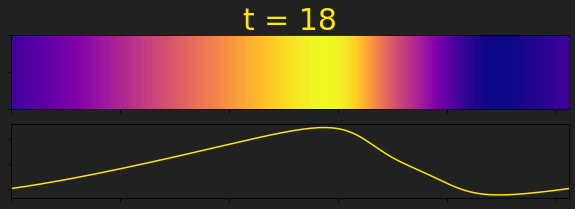

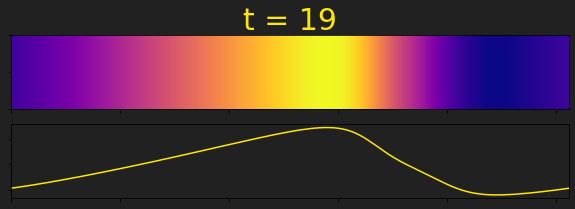

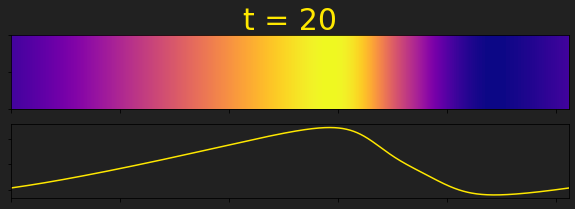

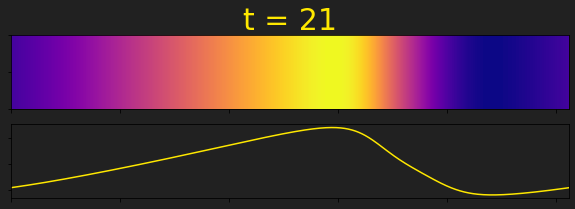

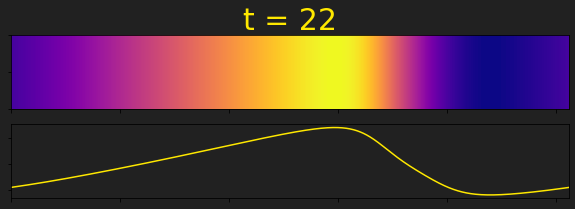

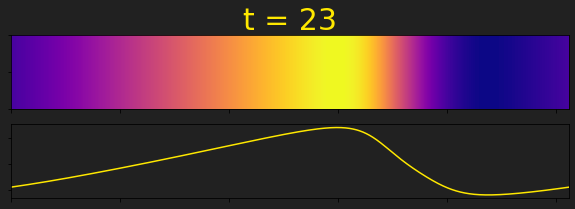

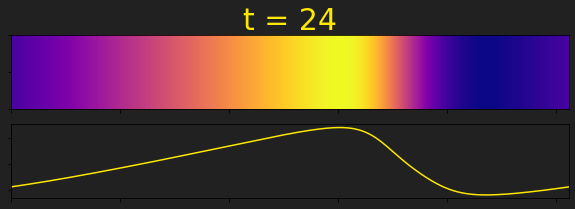

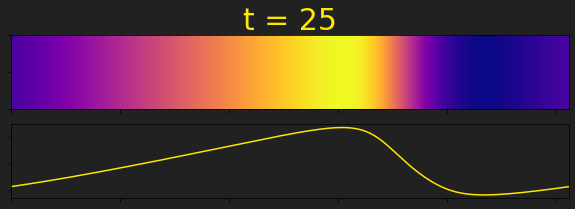

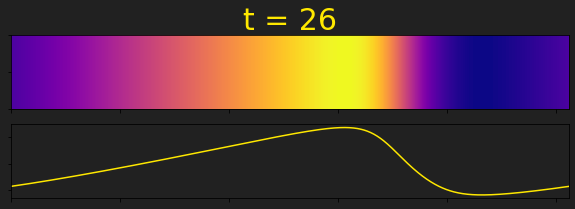

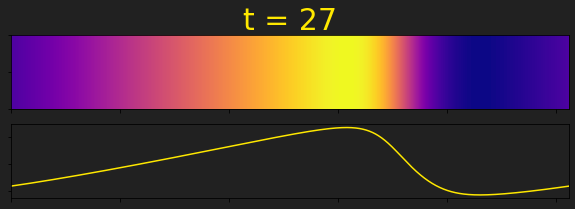

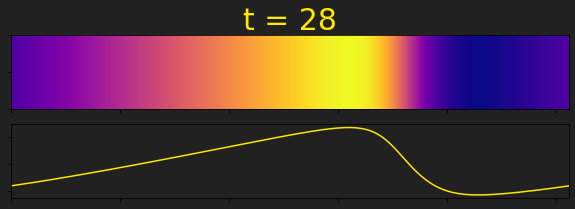

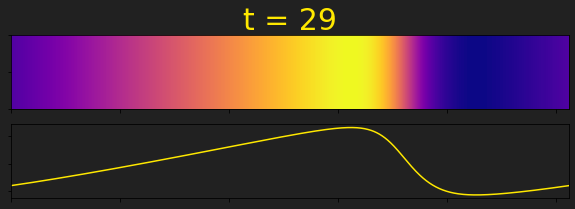

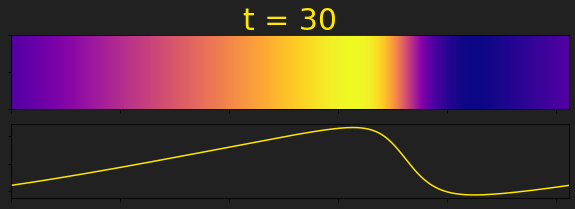

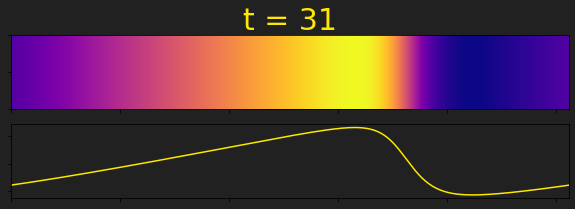

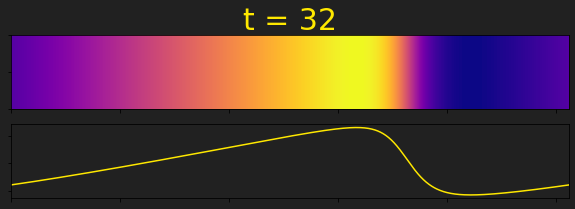

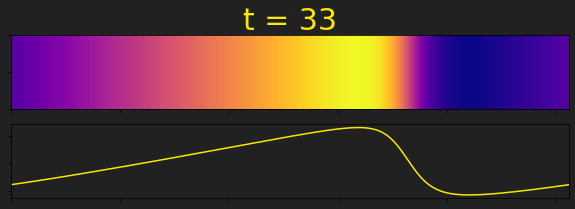

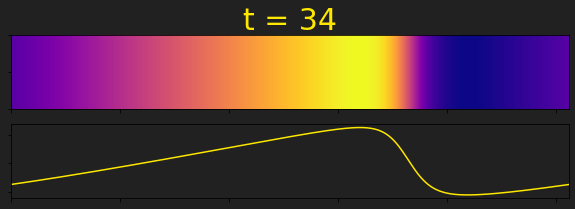

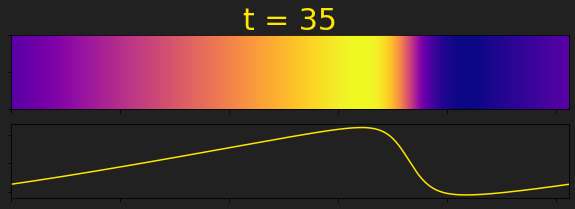

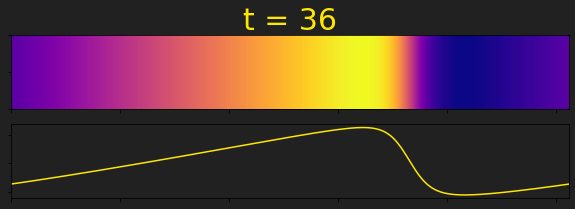

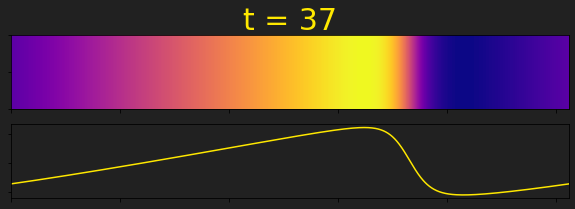

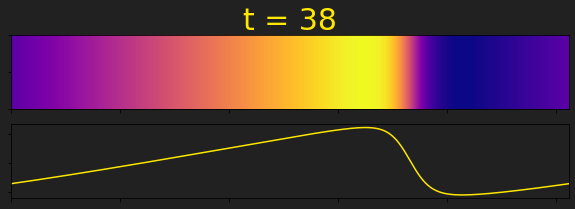

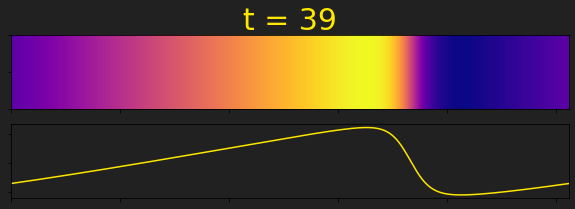

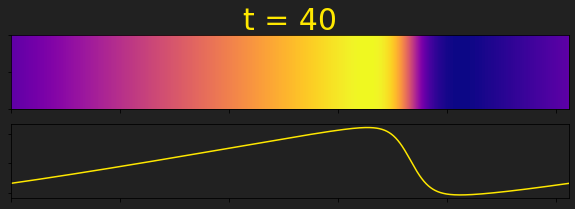

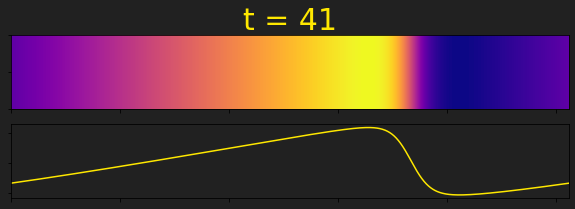

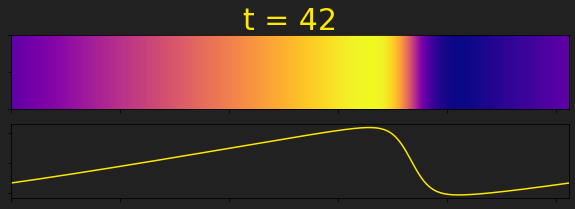

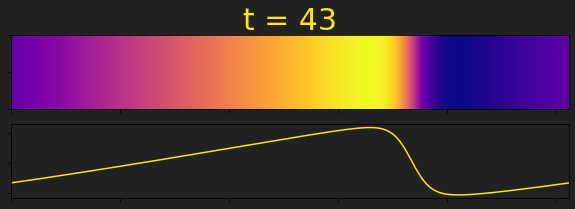

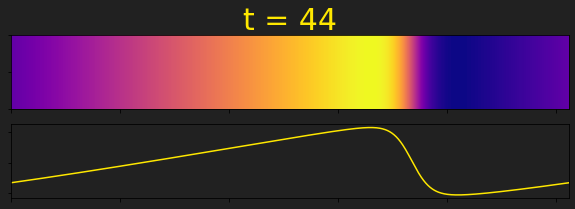

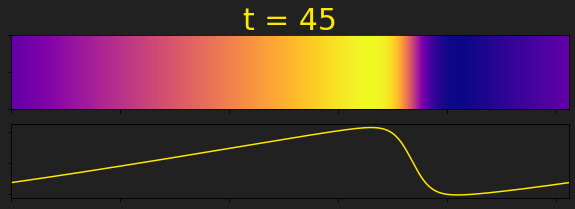

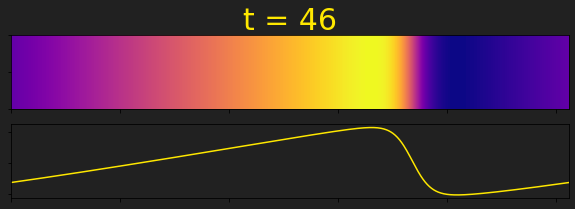

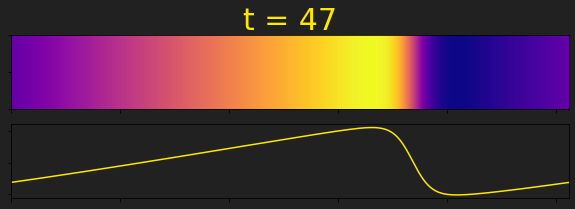

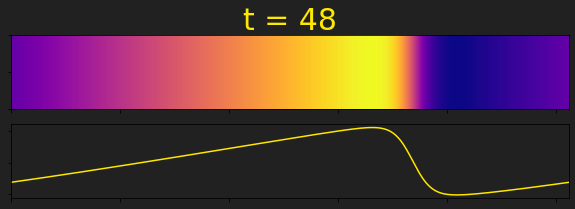

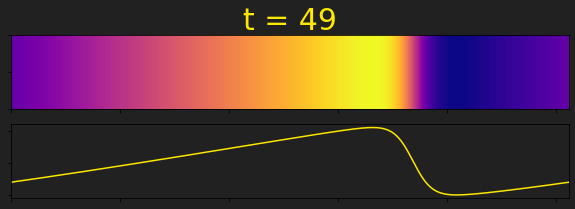

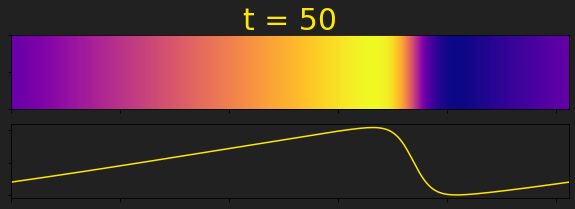

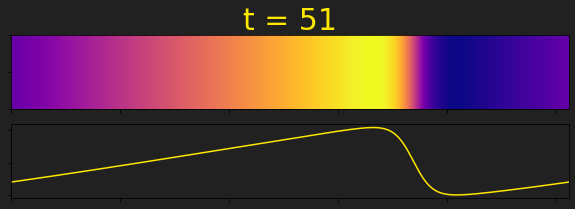

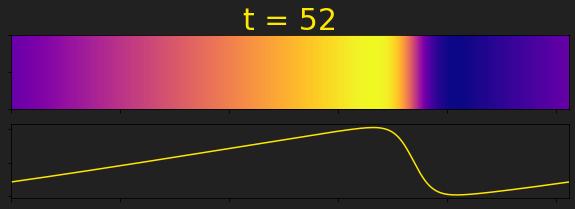

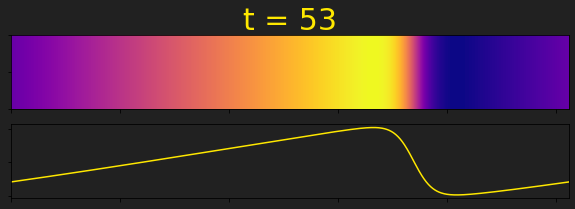

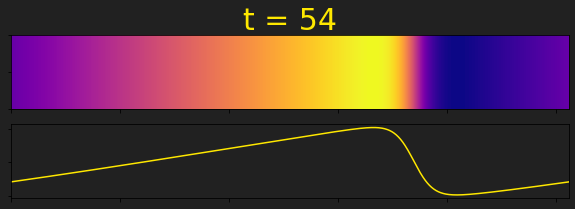

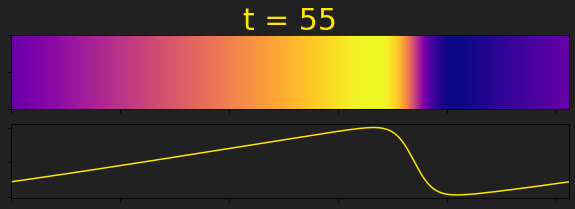

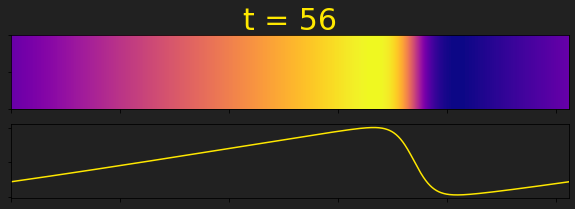

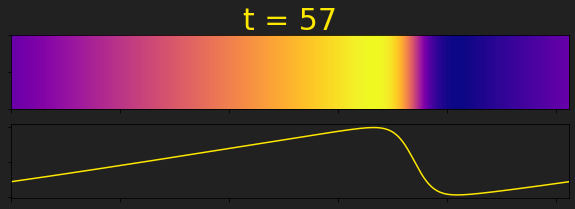

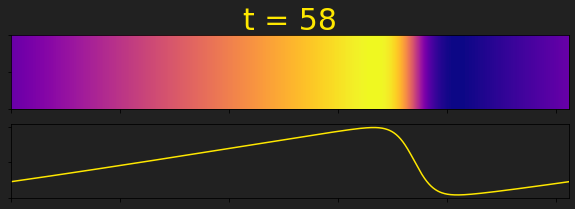

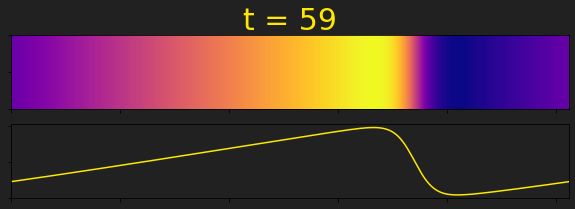

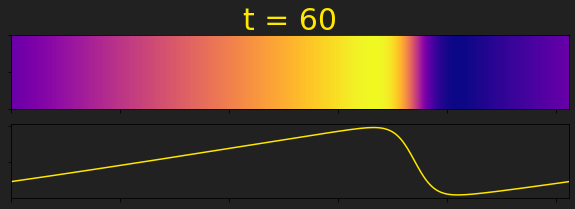

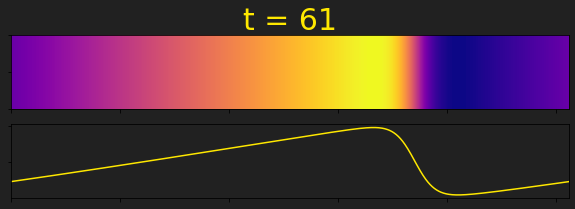

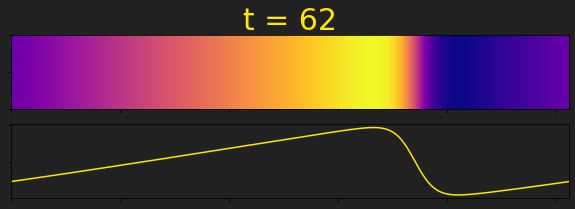

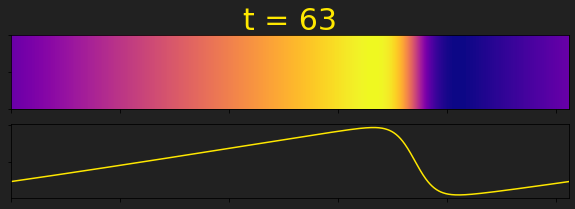

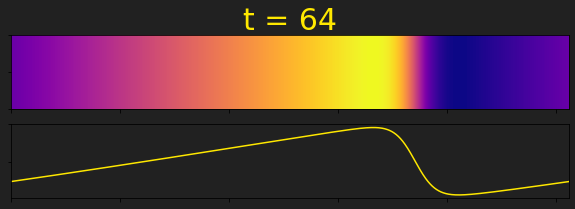

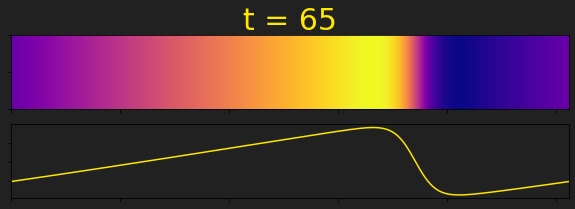

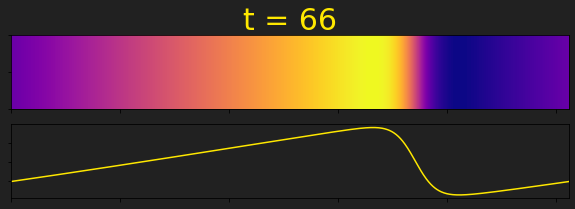

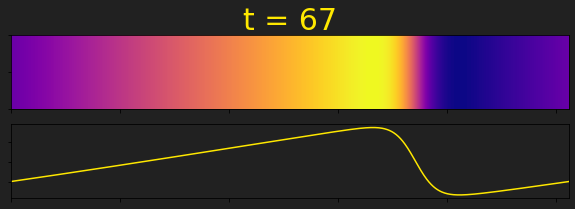

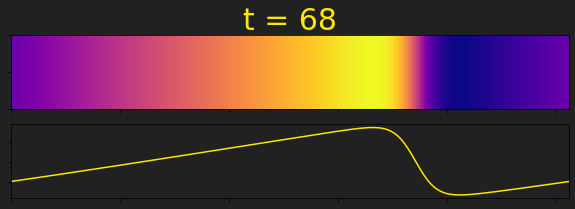

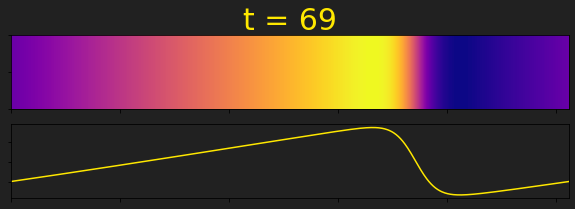

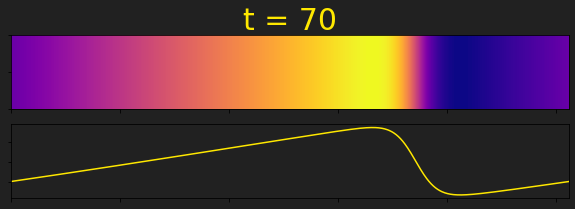

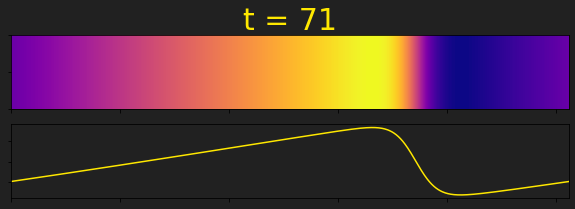

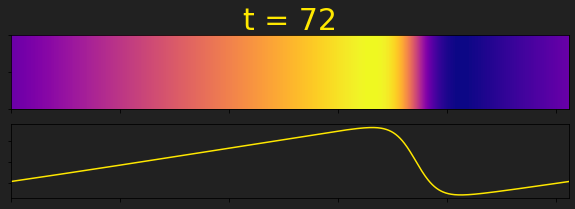

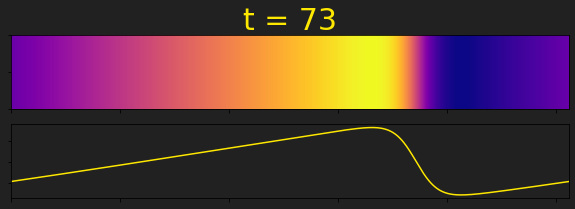

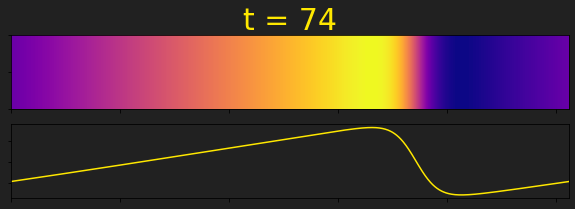

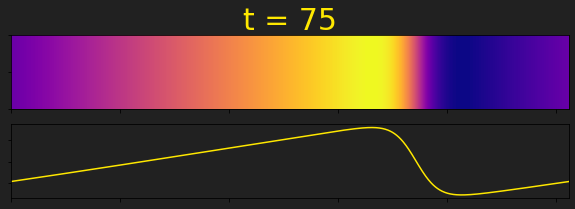

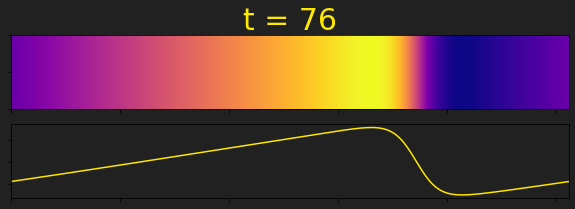

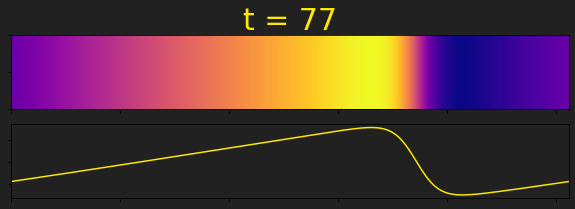

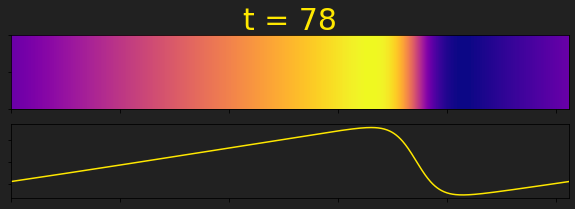

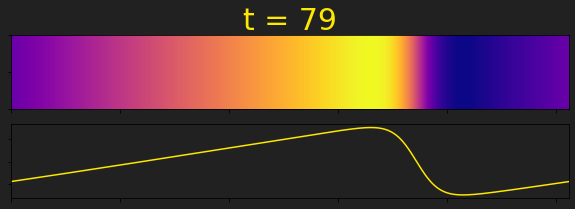

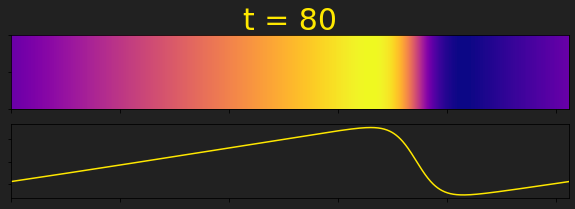

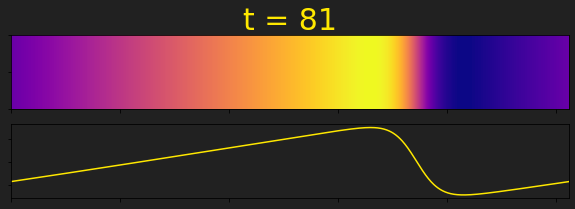

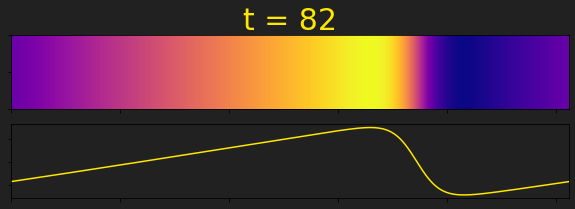

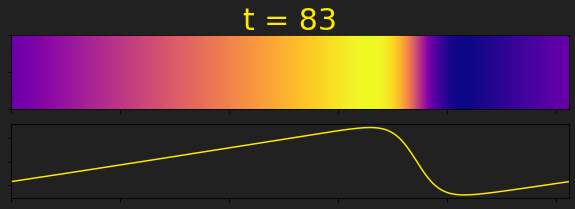

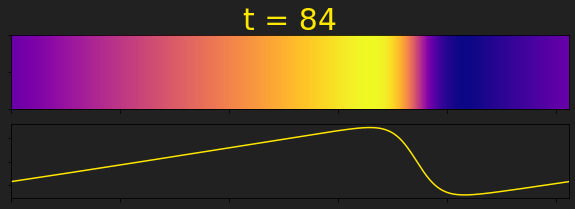

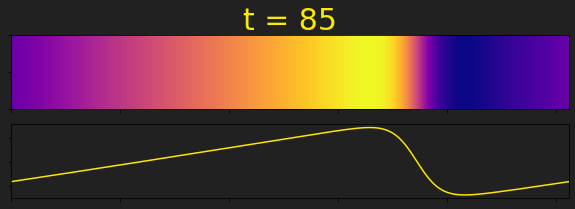

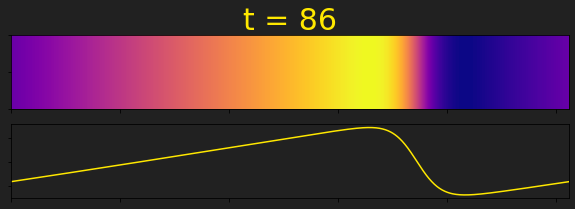

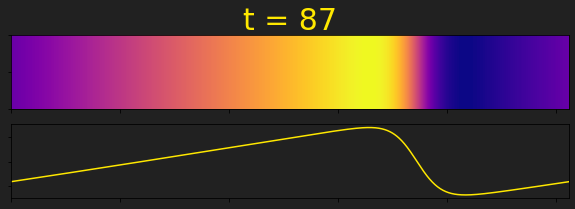

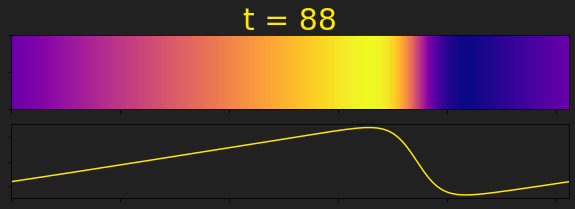

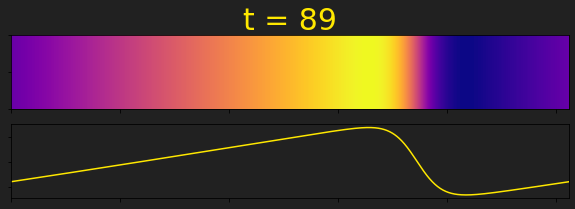

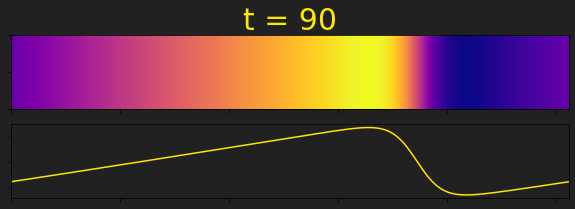

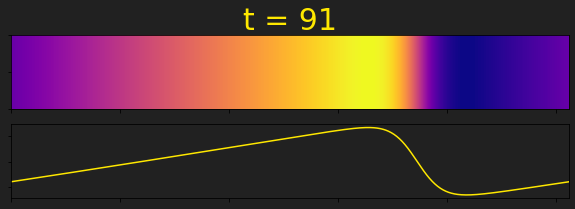

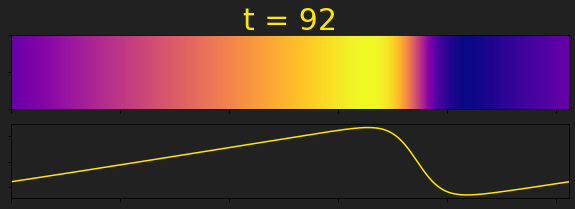

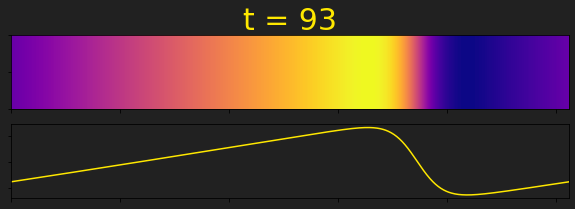

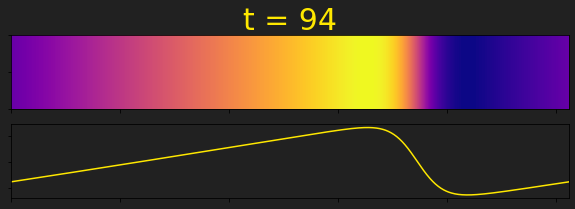

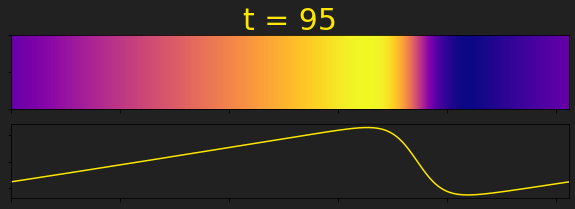

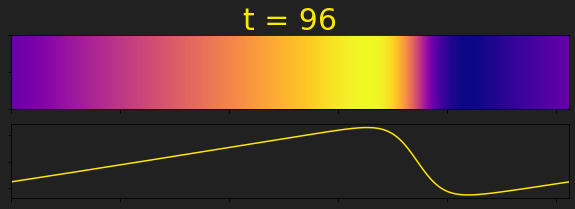

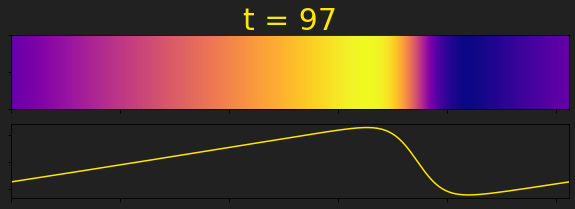

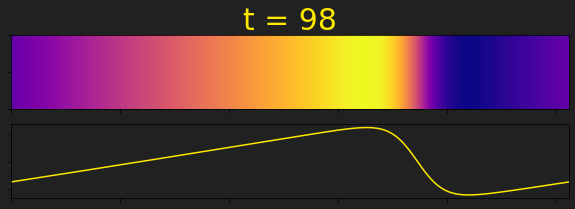

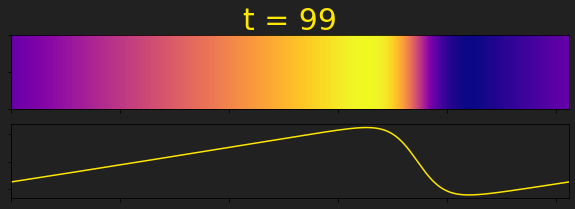

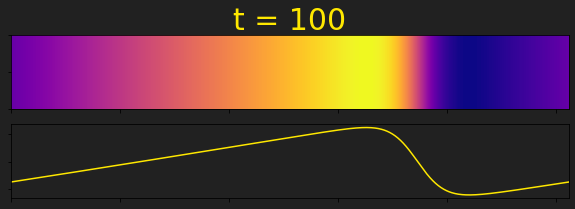

In [46]:
for i in range(1,output_burger_1.shape[1]):
    fig, ax = plt.subplots(2,1,figsize = (10,3), sharex = True)
    ax[0].imshow(output_burger_1[0,i,:].reshape(1,1024), cmap="plasma", aspect="auto")
    ax[1].plot(output_burger_1[0,i,:], c = "#ffe800")
    ax[1].set_facecolor("#212121ff")
    fig.patch.set_facecolor("#212121ff")
    ax[0].set_xticklabels("")
    ax[0].set_yticklabels("")
    ax[1].set_xticklabels("")
    ax[1].set_yticklabels("")
    if len(str(i)) == 1:
        idx = f"00{i}"
    elif len(str(i)) == 2:
        idx = f"0{i}"
    else:
        idx = i
    ax[0].set_title(f"t = {i}", fontsize = 30, color = "#ffe800")
    fig.savefig(f"imagenes_burger/aber_{idx}.png", bbox_inches = 'tight', transparent=False)

In [47]:
# Create the frames
frames = []
imgs = glob.glob("imagenes_burger/*.png")
imgs.sort()
for i in imgs:
    new_frame = Image.open(i)
    frames.append(new_frame)
# Save into a GIF file that loops forever
frames[0].save('burger.gif', format='GIF',
                append_images=frames[1:],
                save_all=True,
                duration=150, loop=0)

## Flujo de Darcy

In [48]:
data_darcy = "datasets/Darcy_421-005/piececonst_r241_N1024_smooth1.mat"
mat_darcy = sio.loadmat(data_darcy)

In [49]:
mat_darcy.keys()

dict_keys(['__header__', '__version__', '__globals__', 'Kcoeff', 'Kcoeff_x', 'Kcoeff_y', 'coeff', 'sol'])

In [50]:
kcoeff_darcy = mat_darcy["Kcoeff"]
kcoeff_x_darcy = mat_darcy["Kcoeff_x"]
kcoeff_y_darcy = mat_darcy["Kcoeff_y"]
coeff_darcy = mat_darcy["coeff"]
sol_darcy = mat_darcy["sol"]

In [54]:
coeff_darcy.shape

(1024, 241, 241)

In [55]:
kcoeff_darcy.shape

(1024, 241, 241)

In [56]:
kcoeff_x_darcy.shape

(1024, 241, 241)

In [57]:
kcoeff_y_darcy.shape

(1024, 241, 241)

In [51]:
sol_darcy.shape

(1024, 241, 241)

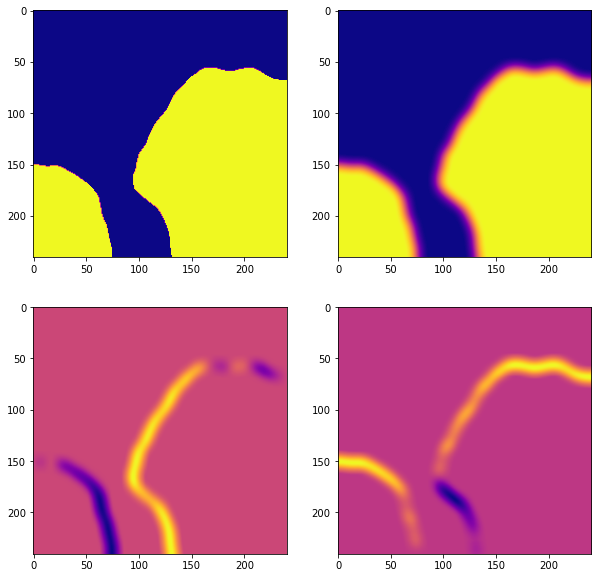

In [67]:
idx = 1
fig, ax = plt.subplots(2,2,figsize=(10,10))
ax[0,0].imshow(coeff_darcy[idx,:,:], cmap="plasma", aspect="auto")
ax[0,1].imshow(kcoeff_darcy[idx,:,:], cmap="plasma", aspect="auto")
ax[1,0].imshow(kcoeff_x_darcy[idx,:,:], cmap="plasma", aspect="auto")
ax[1,1].imshow(kcoeff_y_darcy[idx,:,:], cmap="plasma", aspect="auto")

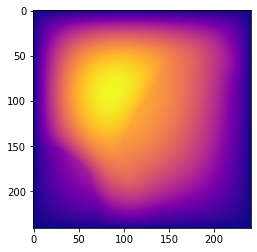

In [69]:
plt.imshow(sol_darcy[idx,:,:], cmap="plasma")

## Navier-Stokes

In [2]:
data = "datasets/NavierStokes/ns_data_V1e-4_N20_T50_R256test.mat"
mat = sio.loadmat(data)

In [15]:
data = "datasets/NavierStokes/NavierStokes_V1e-5_N1200_T20.mat"
mat = sio.loadmat(data)

In [16]:
u = mat["u"]
a = mat["a"]
t = mat["t"]

In [17]:
t.shape

(1, 20)

## u

In [20]:
u_0 = u[0,:,:,:]
u_0.shape

(64, 64, 20)

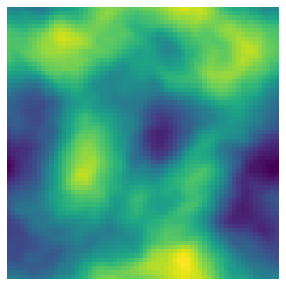

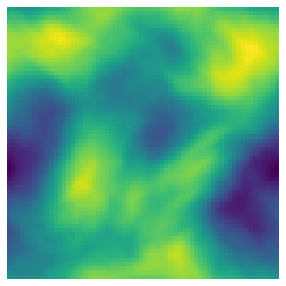

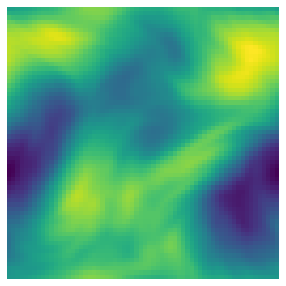

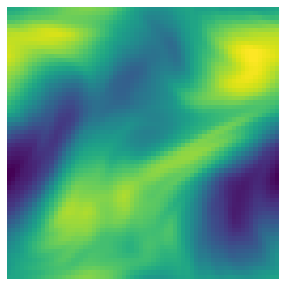

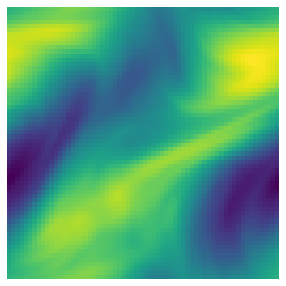

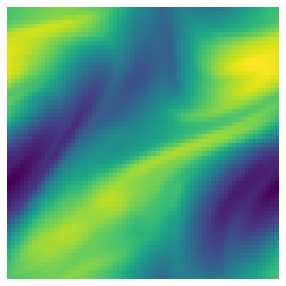

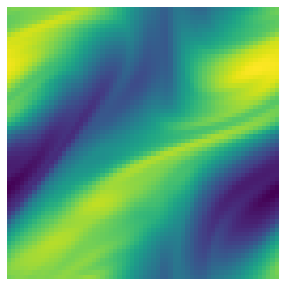

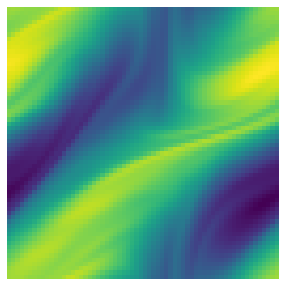

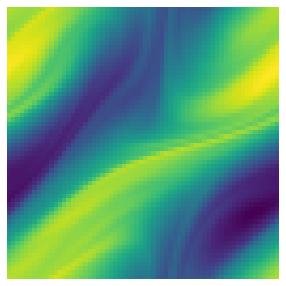

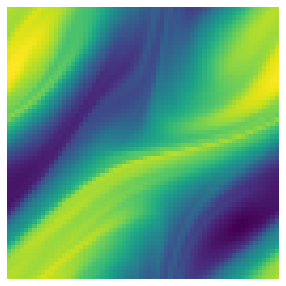

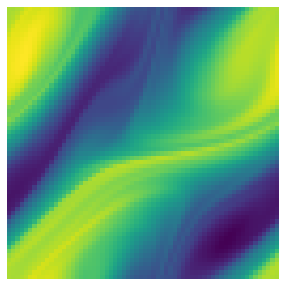

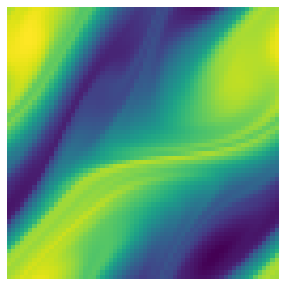

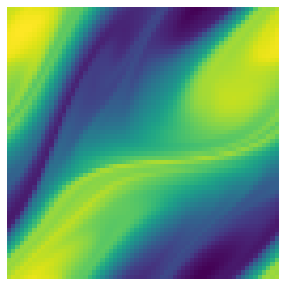

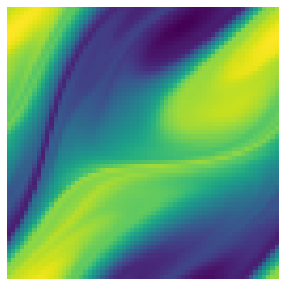

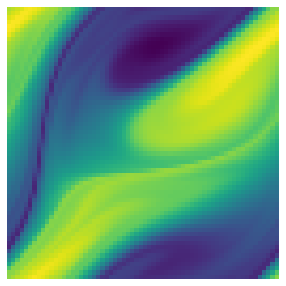

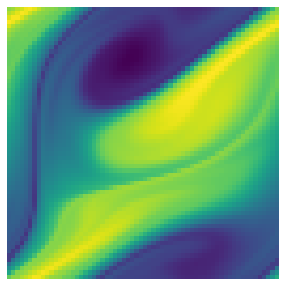

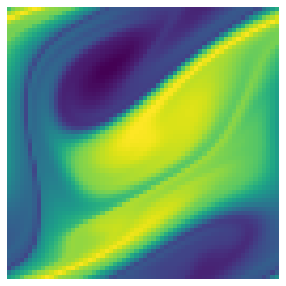

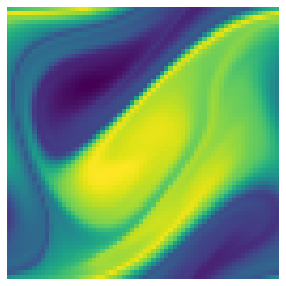

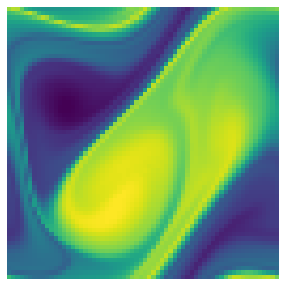

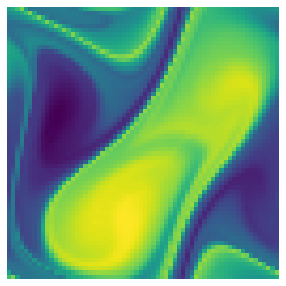

In [25]:
for i in range(u_0.shape[2]):
    fig, ax = plt.subplots(figsize=(15,5))
    ax.imshow(u_0[:,:,i])
    #fig.patch.set_facecolor("#212121ff")
    ax.set_xticklabels("")
    ax.set_yticklabels("")
    [ax.spines[key].set_visible(False) for key in ax.spines]
    ax.set_yticks([])
    ax.set_xticks([])

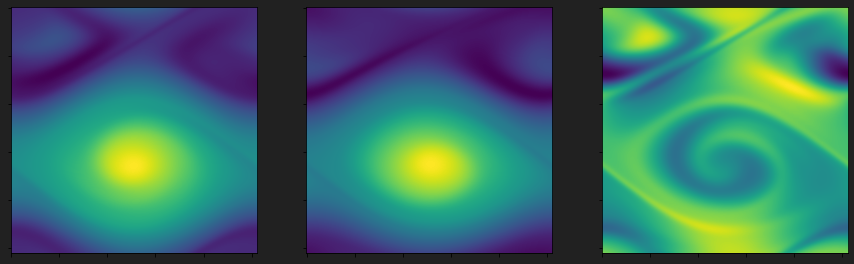

In [5]:
fig, ax = plt.subplots(1,3,figsize=(15,5))
ax[0].imshow(u_0[:,:,-10])
ax[1].imshow(u_0[:,:,-1])
ax[2].imshow(u_0[:,:,-10] - u_0[:,:,-1])
fig.patch.set_facecolor("#212121ff")
for i in range(3):
    ax[i].set_xticklabels("")
    ax[i].set_yticklabels("")

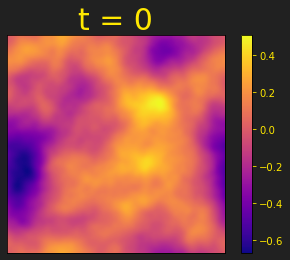

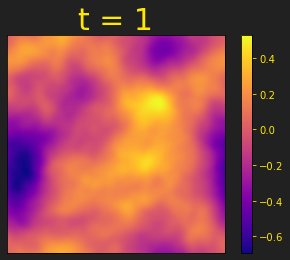

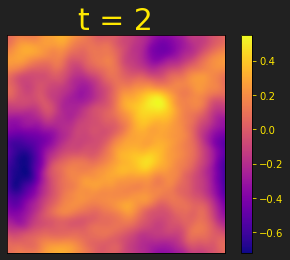

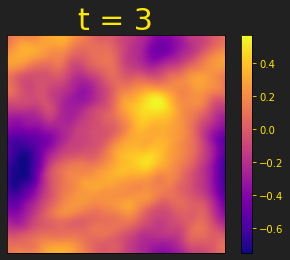

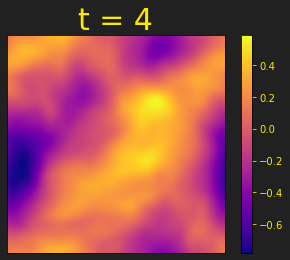

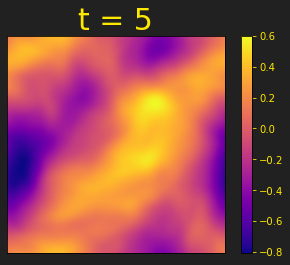

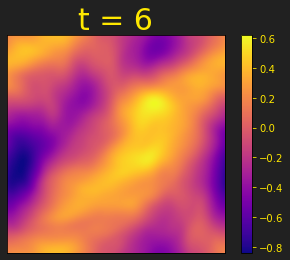

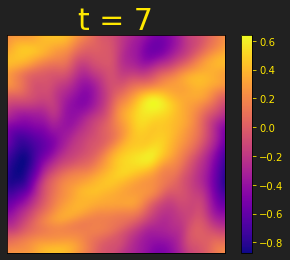

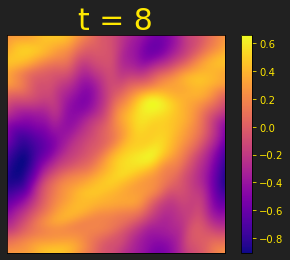

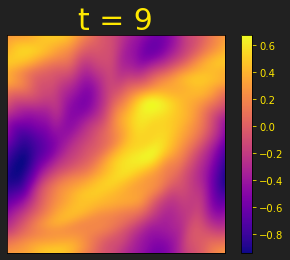

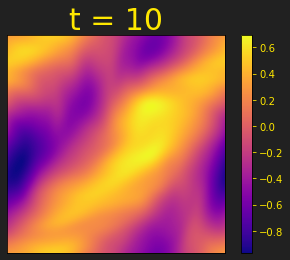

In [94]:
for i in range(11):
    fig, ax = plt.subplots()
    im = ax.imshow(u_0[:,:,i], cmap = "plasma")
    fig.patch.set_facecolor("#212121ff")
    if len(str(i)) == 1:
        idx = f"00{i}"
    elif len(str(i)) == 2:
        idx = f"0{i}"
    else:
        idx = i
    ax.set_title(f"t = {i}", fontsize = 30, color = "#ffe800")
    ax.tick_params(left=False, bottom=False)
    ax.set_xticklabels("")
    ax.set_yticklabels("")
    cbar = fig.colorbar(im)
    cbar.ax.yaxis.set_tick_params(color="#ffe800")
    # Para cambiar el color de los "ticks" de la barra de color
    plt.setp(plt.getp(cbar.ax.axes, 'yticklabels'), color="#ffe800")
    fig.savefig(f"u_10/aber_{idx}.png", bbox_inches = 'tight', transparent=False)

In [95]:
# Create the frames
frames = []
imgs = glob.glob("u_10/*.png")
imgs.sort()
for i in imgs:
    new_frame = Image.open(i)
    frames.append(new_frame)
# Save into a GIF file that loops forever
frames[0].save('primeros10.gif', format='GIF',
                append_images=frames[1:],
                save_all=True,
                duration=150, loop=0)

Otro ejemplo

In [96]:
u_n = u[13,:,:,:]
u_n.shape

(256, 256, 200)

In [97]:
u_n[:,:,-1]

array([[3.0950222, 3.1378145, 3.1819239, ..., 2.9768317, 3.0144205,
        3.0538301],
       [3.091037 , 3.1327736, 3.1758127, ..., 2.9756465, 3.0123963,
        3.050861 ],
       [3.0865035, 3.1271272, 3.1690311, ..., 2.9740195, 3.0099094,
        3.0473924],
       ...,
       [3.1031168, 3.1486728, 3.1955705, ..., 2.9774077, 3.0172913,
        3.0592372],
       [3.1011162, 3.145822 , 3.1918623, ..., 2.977745 , 3.0169096,
        3.058067 ],
       [3.098401 , 3.1421843, 3.1872945, ..., 2.977542 , 3.0159395,
        3.056249 ]], dtype=float32)

0
1
2
3
4
5
6
7
8
9
10


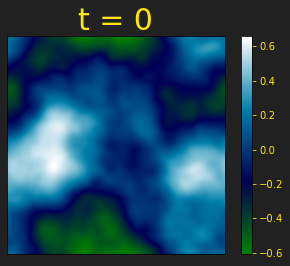

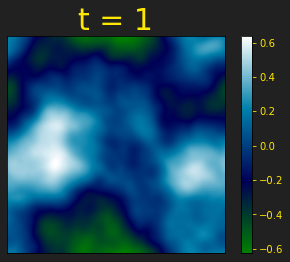

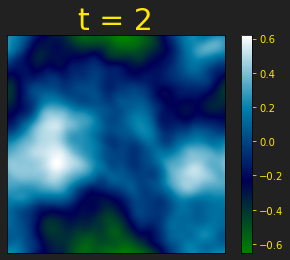

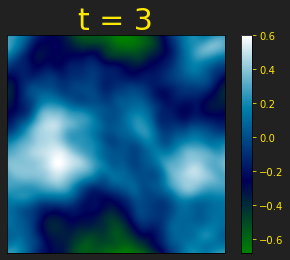

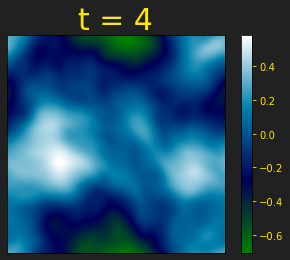

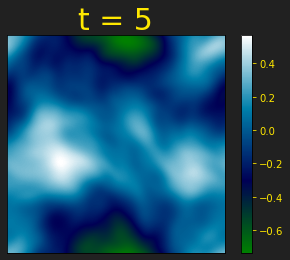

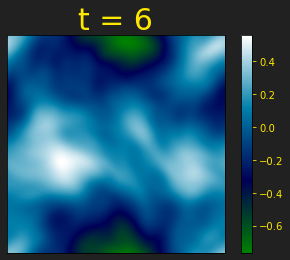

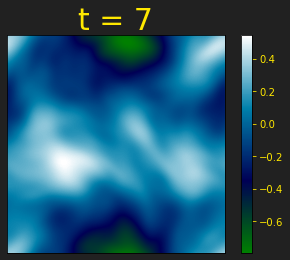

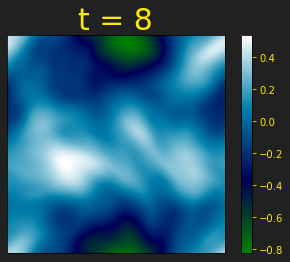

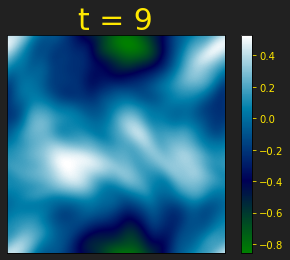

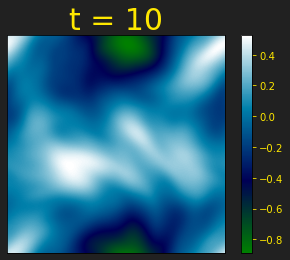

In [98]:
for i in range(11):
    print(i)
    fig, ax = plt.subplots()
    im = ax.imshow(u_n[:,:,i], cmap = "ocean")
    fig.patch.set_facecolor("#212121ff")
    if len(str(i)) == 1:
        idx = f"00{i}"
    elif len(str(i)) == 2:
        idx = f"0{i}"
    else:
        idx = i
    ax.set_title(f"t = {i}", fontsize = 30, color = "#ffe800")
    ax.tick_params(left=False, bottom=False)
    ax.set_xticklabels("")
    ax.set_yticklabels("")
    cbar = fig.colorbar(im)
    cbar.ax.yaxis.set_tick_params(color="#ffe800")
    # Para cambiar el color de los "ticks" de la barra de color
    plt.setp(plt.getp(cbar.ax.axes, 'yticklabels'), color="#ffe800")
    fig.savefig(f"u_13/aber_{idx}.png", bbox_inches = 'tight', transparent=False)

In [99]:
# Create the frames
frames = []
imgs = glob.glob("u_13/*.png")
imgs.sort()
for i in imgs:
    new_frame = Image.open(i)
    frames.append(new_frame)
# Save into a GIF file that loops forever
frames[0].save('primeros10_13.gif', format='GIF',
                append_images=frames[1:],
                save_all=True,
                duration=150, loop=0)

## a

In [144]:
a.shape

(20, 256, 256)

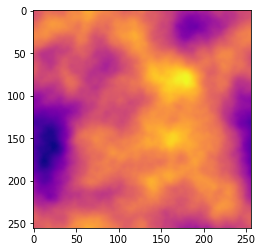

In [114]:
plt.imshow(a[0,:,:], cmap="plasma")

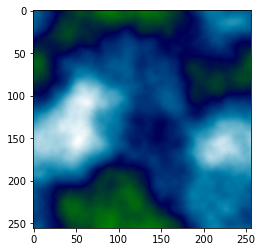

In [13]:
plt.imshow(a[13,:,:], cmap="ocean")

## Generando datos

In [1]:
import torch

import math

import matplotlib.pyplot as plt
import matplotlib

# from drawnow import drawnow, figure

from random_fields import GaussianRF

from timeit import default_timer

import scipy.io

In [2]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
device

device(type='cuda', index=0)

In [11]:
#w0: initial vorticity
#f: forcing term
#visc: viscosity (1/Re)
#T: final time
#delta_t: internal time-step for solve (descrease if blow-up)
#record_steps: number of in-time snapshots to record
def navier_stokes_2d(w0, f, visc, T, delta_t=1e-4, record_steps=1):

    #Grid size - must be power of 2
    N = w0.size()[-1]

    #Maximum frequency
    k_max = math.floor(N/2.0)

    #Number of steps to final time
    steps = math.ceil(T/delta_t)

    #Initial vorticity to Fourier space
    w_h = torch.fft.fft(w0, 2, norm="backward")

    #Forcing to Fourier space
    f_h = torch.fft.fft(f, 2, norm="backward")

    #If same forcing for the whole batch
    if len(f_h.size()) < len(w_h.size()):
        f_h = torch.unsqueeze(f_h, 0)

    #Record solution every this number of steps
    record_time = math.floor(steps/record_steps)

    #Wavenumbers in y-direction
    k_y = torch.cat((torch.arange(start=0, end=k_max, step=1, device=w0.device), torch.arange(start=-k_max, end=0, step=1, device=w0.device)), 0).repeat(N,1)
    #Wavenumbers in x-direction
    k_x = k_y.transpose(0,1)
    #Negative Laplacian in Fourier space
    lap = 4*(math.pi**2)*(k_x**2 + k_y**2)
    lap[0,0] = 1.0
    #Dealiasing mask
    dealias = torch.unsqueeze(torch.logical_and(torch.abs(k_y) <= (2.0/3.0)*k_max, torch.abs(k_x) <= (2.0/3.0)*k_max).float(), 0)

    #Saving solution and time
    sol = torch.zeros(*w0.size(), record_steps, device=w0.device)
    sol_t = torch.zeros(record_steps, device=w0.device)

    #Record counter
    c = 0
    #Physical time
    t = 0.0
    for j in range(steps):
        #Stream function in Fourier space: solve Poisson equation
        psi_h = w_h.clone()
        psi_h[...,0] = psi_h[...,0]/lap
        psi_h[...,1] = psi_h[...,1]/lap

        #Velocity field in x-direction = psi_y
        q = psi_h.clone()
        temp = q[...,0].clone()
        q[...,0] = -2*math.pi*k_y*q[...,1]
        q[...,1] = 2*math.pi*k_y*temp
        q = torch.fft.ifft(q, 2, norm="backward", signal_sizes=(N,N))

        #Velocity field in y-direction = -psi_x
        v = psi_h.clone()
        temp = v[...,0].clone()
        v[...,0] = 2*math.pi*k_x*v[...,1]
        v[...,1] = -2*math.pi*k_x*temp
        v = torch.fft.ifft(v, 2, norm="backward", signal_sizes=(N,N))

        #Partial x of vorticity
        w_x = w_h.clone()
        temp = w_x[...,0].clone()
        w_x[...,0] = -2*math.pi*k_x*w_x[...,1]
        w_x[...,1] = 2*math.pi*k_x*temp
        w_x = torch.fft.ifft(w_x, 2, norm="backward", signal_sizes=(N,N))

        #Partial y of vorticity
        w_y = w_h.clone()
        temp = w_y[...,0].clone()
        w_y[...,0] = -2*math.pi*k_y*w_y[...,1]
        w_y[...,1] = 2*math.pi*k_y*temp
        w_y = torch.fft.ifft(w_y, 2, norm="backward", signal_sizes=(N,N))

        #Non-linear term (u.grad(w)): compute in physical space then back to Fourier space
        F_h = torch.fft.fft(q*w_x + v*w_y, 2, norm="backward")

        #Dealias
        F_h[...,0] = dealias* F_h[...,0]
        F_h[...,1] = dealias* F_h[...,1]

        #Cranck-Nicholson update
        w_h[...,0] = (-delta_t*F_h[...,0] + delta_t*f_h[...,0] + (1.0 - 0.5*delta_t*visc*lap)*w_h[...,0])/(1.0 + 0.5*delta_t*visc*lap)
        w_h[...,1] = (-delta_t*F_h[...,1] + delta_t*f_h[...,1] + (1.0 - 0.5*delta_t*visc*lap)*w_h[...,1])/(1.0 + 0.5*delta_t*visc*lap)

        #Update real time (used only for recording)
        t += delta_t

        if (j+1) % record_time == 0:
            #Solution in physical space
            w = torch.fft.ifft(w_h, 2, norm="backward", signal_sizes=(N,N))

            #Record solution and time
            sol[...,c] = w
            sol_t[c] = t

            c += 1


    return sol, sol_t

In [12]:
%%time
#Resolution
s = 256
sub = 1

#Number of solutions to generate
N = 80

#Set up 2d GRF with covariance parameters
GRF = GaussianRF(2, s, alpha=2.5, tau=7, device=device)

#Forcing function: 0.1*(sin(2pi(x+y)) + cos(2pi(x+y)))
t = torch.linspace(0, 1, s+1, device=device)
t = t[0:-1]

X,Y = torch.meshgrid(t, t)
f = 0.1*(torch.sin(2*math.pi*(X + Y)) + torch.cos(2*math.pi*(X + Y)))

#Number of snapshots from solution
record_steps = 200

#Inputs
a = torch.zeros(N, s, s)
#Solutions
u = torch.zeros(N, s, s, record_steps)

#Solve equations in batches (order of magnitude speed-up)

#Batch size
bsize = 20

c = 0
t0 =default_timer()
for j in range(N//bsize):

    #Sample random fields
    w0 = GRF.sample(bsize)

    #Solve NS
    sol, sol_t = navier_stokes_2d(w0, f, 1e-3, 50.0, 1e-4, record_steps)

    a[c:(c+bsize),...] = w0
    u[c:(c+bsize),...] = sol

    c += bsize
    t1 = default_timer()
    print(j, c, t1-t0)

scipy.io.savemat('ns_data_V1e-4_N80_T200_R256train.mat', mdict={'a': a.cpu().numpy(), 'u': u.cpu().numpy(), 
                                                                't': sol_t.cpu().numpy()})

RuntimeError: The size of tensor a (20) must match the size of tensor b (256) at non-singleton dimension 0